# import python modules

In [18]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split



# helper functions (if necessary)

In [3]:
#python code...

# read in training data 

In [12]:
df = pd.read_csv('train.tsv',sep="\t")

# visualize data

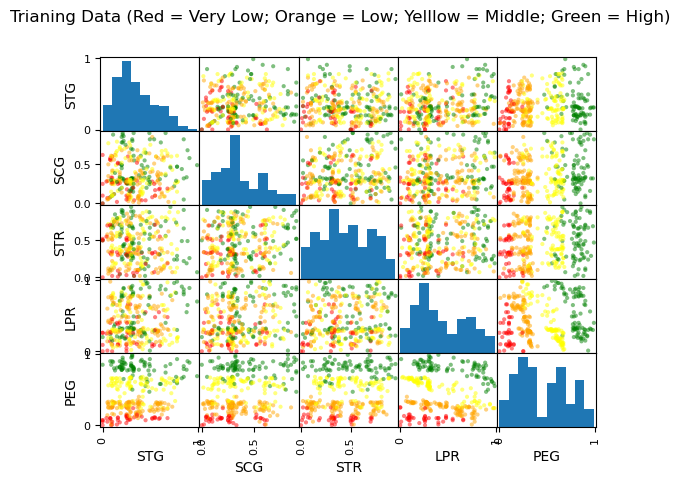

In [15]:
Colornames = {'Very_Low': 'Red' , 'Low': 'Orange', 'Middle': 'Yellow', 'High': 'Green'}
colors = [Colornames[x] for x in df['UNS']]

pd.plotting.scatter_matrix(df, c=colors)
plt.suptitle('Trianing Data (Red = Very Low; Orange = Low; Yelllow = Middle; Green = High)')
plt.show()

# experiment with building classification models

In [27]:
x = df.drop(['UNS'], axis = 1 )
y = df['UNS']


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

results = cross_val_score(knn, x, y, cv = 5)
predict = cross_val_predict(knn, x, y, cv=5)



0.8709343770875505
0.8509316770186336
0.834907616892911


C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# visualize experimental results (accuracy, precision, recall)

In [18]:
print(precision_score(y,predict, average='macro'))
print(accuracy_score(y,predict))
print(recall_score(y,predict,average ='macro'))

# Question: What features and classifier parameters work "best"?

while clsoe through testing using LPR and PEG would vastly out preform using the entire data set using these 2 results in the "best" accuracy and persision scores

# create "best" classification model on training data

In [34]:
x = df.drop(['UNS'], axis = 1 )
y = df['UNS']

bestx = x[{'LPR','PEG'}]
besty = y

bestknn = KNeighborsClassifier(n_neighbors=3)
bestknn.fit(bestx,besty)

results = cross_val_score(bestknn, bestx, besty, cv = 5)
predict = cross_val_predict(bestknn, bestx, besty, cv=5)

print(precision_score(besty,predict, average='macro'))
print(accuracy_score(besty,predict))
print(recall_score(besty,predict,average ='macro'))

0.9630376344086021
0.953416149068323
0.9442886770092652


C:\Users\carte\AppData\Local\Temp\ipykernel_2616\1930129211.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  bestx = x[{'LPR','PEG'}]
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11

# read in test data

In [41]:
test = pd.read_csv('test.tsv',sep="\t")
print(test)

      STG   SCG   STR   LPR   PEG
0   0.510  0.40  0.40  0.59  0.23
1   0.170  0.36  0.80  0.14  0.66
2   0.780  0.21  0.68  0.65  0.75
3   0.600  0.14  0.22  0.11  0.66
4   0.410  0.09  0.58  0.18  0.58
..    ...   ...   ...   ...   ...
76  0.440  0.32  0.55  0.33  0.52
77  0.445  0.70  0.82  0.16  0.64
78  0.115  0.35  0.65  0.27  0.04
79  0.275  0.10  0.72  0.10  0.30
80  0.285  0.64  0.18  0.61  0.45

[81 rows x 5 columns]


# use model to make predictions of test data 

In [49]:
testx = test[{'LPR','PEG'}]
testy = bestknn.predict(testX)

results = cross_val_score(bestknn, testx, testy, cv = 5)
predict = cross_val_predict(bestknn, testx, testy, cv=5)



0.9325396825396826
0.9135802469135802
0.9157986111111112


C:\Users\carte\AppData\Local\Temp\ipykernel_2616\3455337018.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  testx = test[{'LPR','PEG'}]
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1

# visualize test data with predicted labels

In [66]:
print(precision_score(testy,predict, average='macro'))
print(accuracy_score(testy,predict))
print(recall_score(testy,predict,average ='macro'))



0.9325396825396826
0.9135802469135802
0.9157986111111112


# write test data and predictions to \<YourLastName>.tsv

In [68]:
test['UNS'] = testy
test.to_csv("Auer",sep = "\t", header=None)